¡Buen día Joaquin! Como te va?

Mi nombre es Emanuel Fitta! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Quiero felicitarte, de manera muy sincera. Pienso que tu trabajo es excelente. Sobre todo en el tema de los test estadísticos, donde aplicas algunos conceptos no básicos como la correccion de Bonferroni. Además, quiero felicitarte ya que las conclusiones que fuiste colocando son muy atinadas, lo suficientemente profundas. Creo que vas por buen camino, reitero mi felicitación y nada, fue un placer revisar tu proyecto, me diverti mucho, siguiendo tu analisis y descubriendo cosas junto a lo que ibas desarrollando.
    
Te deseo mucho éxito, estoy seguro que te espera un gran futuro en esta area.

# Descripción del proyecto
Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

- Primero, estudia el embudo de ventas. Descubre cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

- Luego, observa los resultados de un test A/A/B. (Sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

- Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

- Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios y las usuarias participan en experimentos.

## Abrir el archivo de datos, leer la información general y Preparar los datos para el análisis

Ruta de archivo: /datasets/logs_exp_us.csv

- Cambia el nombre de las columnas de manera que sea conveniente para ti
- Comprueba si hay tipos de datos y valores ausentes. Corrige los datos si es necesario
- Agrega una columna de fecha y hora y una columna separada para las fechas

### Obtenemos los datos y las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Perfecto! Empezamos bien! Lograste leer el archivo de manera correcta haciendo uso del parámetro sep.

### Aplicamos las correcciones de los datos

In [2]:
# Cambiar los nombres de las columnas a snake_case
data.columns = ['event_name', 'device_id_hash', 'event_timestamp', 'exp_id']

# Crear una nueva columna con la fecha y hora (event_datetime)
data['event_datetime'] = pd.to_datetime(data['event_timestamp'], unit='ms')

# Crear una nueva columna solo con la fecha (event_date)
data['event_date'] = data['event_datetime'].dt.date

# Convertir device_id_hash a string (object)
data['device_id_hash'] = data['device_id_hash'].astype(str)

# Cambiar exp_id a categoría si tiene pocos valores únicos
if data['exp_id'].nunique() < 100:  # Ajustar el umbral según tus necesidades
    data['exp_id'] = data['exp_id'].astype('category')

# Borrar los duplicados    
data = data.drop_duplicates()


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Hiciste una transformación muy atinada, a formato de fecha. Además, creo que fue una excelente idea hacer algunas de las transformaciones de tipo de dato, sobre todo veo muy interesante que exp_id, hayas decidio transformarlo a category.

### Previsualizamos los datos y comprobamos duplicados y valores nulos

In [3]:
# Mostrar las primeras filas del archivo
print("\n--- Data Info ---\n")
print(data.head())

# Obtener información general del DataFrame
print("\n--- Data Head ---\n")
print(data.info())

# Comprobar duplicados
print("\n--- Comprobar duplicados ---\n")
duplicated_rows = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicated_rows}")

# Comprobar valores nulos
print("\n--- Comprobar valores nulos ---\n")
missing_values = data.isnull().sum()
print("Valores nulos por columna:")
print(missing_values)


--- Data Info ---

                event_name       device_id_hash  event_timestamp exp_id  \
0         MainScreenAppear  4575588528974610257       1564029816    246   
1         MainScreenAppear  7416695313311560658       1564053102    246   
2  PaymentScreenSuccessful  3518123091307005509       1564054127    248   
3         CartScreenAppear  3518123091307005509       1564054127    248   
4  PaymentScreenSuccessful  6217807653094995999       1564055322    248   

           event_datetime  event_date  
0 1970-01-19 02:27:09.816  1970-01-19  
1 1970-01-19 02:27:33.102  1970-01-19  
2 1970-01-19 02:27:34.127  1970-01-19  
3 1970-01-19 02:27:34.127  1970-01-19  
4 1970-01-19 02:27:35.322  1970-01-19  

--- Data Head ---

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       243713 non-null  object      

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Además, me gusta como colocas los titulares, eso hace que sean mucho más faciles de leer. Y como mencionas en las conclusiones, ahora tienes un dataframe limpio y listo para ser usado en los análisis que vienen.

### Conclusiones del análisis:

1. **Carga y Exploración de Datos**: 
   - Se cargó el archivo CSV que contenía datos de eventos de la aplicación. Las columnas originales eran: `eventname`, `deviceidhash`, `eventtimestamp` y `expid`.
   - Se utilizó el método `head` para revisar las primeras filas y `info` para obtener información general de las columnas, su tipo de dato, y la cantidad de valores no nulos.

2. **Cambio de Formato de Columnas**:
   - Los nombres de las columnas se transformaron a un formato más legible y estandarizado en `snake_case`, cambiando los nombres a: `event_name`, `device_id_hash`, `event_timestamp`, y `exp_id`.
   - La columna `device_id_hash` se convirtió de un tipo numérico a cadena (`str`), ya que los identificadores no son utilizados para cálculos.
   - Se crearon dos nuevas columnas:
     - `event_datetime`: que contiene la fecha y hora completa convertida desde `event_timestamp`.
     - `event_date`: que contiene solo la fecha, sin la hora.

3. **Limpieza de Datos**:
   - Se identificaron y eliminaron las filas duplicadas, que se consideraron errores de tracking de eventos.
   - Se verificaron los valores nulos en las columnas, permitiendo evaluar posibles problemas de calidad de datos en futuras etapas.

4. **Optimización de Tipos de Datos**:
   - La columna `exp_id` se convirtió en una categoría, ya que el número de valores únicos es relativamente pequeño. Esto mejora el rendimiento y reduce el uso de memoria.

5. **Resultados Finales**:
   - El DataFrame resultante contiene datos limpios y estructurados de manera eficiente, con las nuevas columnas de fecha y fecha/hora, sin duplicados, y con los tipos de datos correctamente asignados para facilitar futuros análisis o visualizaciones.
   
## Estudiar y comprobar los datos

- ¿Cuántos eventos hay en los registros?
- ¿Cuántos usuarios y usuarias hay en los registros?
- ¿Cuál es el promedio de eventos por usuario?
- ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?
- ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
- Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [4]:
# Número total de eventos (filas)
print("\n--- Número total de eventos ---\n")
total_events = len(data)
print(f"Total de eventos en los registros: {total_events}")


--- Número total de eventos ---

Total de eventos en los registros: 243713


#### ¿Cuántos usuarios y usuarias hay en los registros?

In [5]:
# Número de usuarios únicos
print("\n--- Número de usuarios únicos ---\n")
unique_users = data['device_id_hash'].nunique()
print(f"Total de usuarios en los registros: {unique_users}")


--- Número de usuarios únicos ---

Total de usuarios en los registros: 7551


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! En este caso identificamos a los usuarios con devide_id_hash.

#### ¿Cuál es el promedio de eventos por usuario?

In [6]:
# Promedio de eventos por usuario
print("\n--- Promedio de eventos por usuario ---\n")
avg_events_per_user = total_events / unique_users
print(f"Promedio de eventos por usuario: {avg_events_per_user}")


--- Promedio de eventos por usuario ---

Promedio de eventos por usuario: 32.27559263673685


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente! 

#### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.

In [7]:
# Fecha mínima y máxima
print("\n--- Fecha mínima y máxima ---\n")
min_date = data['event_datetime'].min()
max_date = data['event_datetime'].max()
print(f"Periodo de tiempo cubierto: Desde {min_date} hasta {max_date}")


--- Fecha mínima y máxima ---

Periodo de tiempo cubierto: Desde 1970-01-19 02:27:09.816000 hasta 1970-01-19 02:46:52.517000


#### Trazar un histograma por fecha y hora.

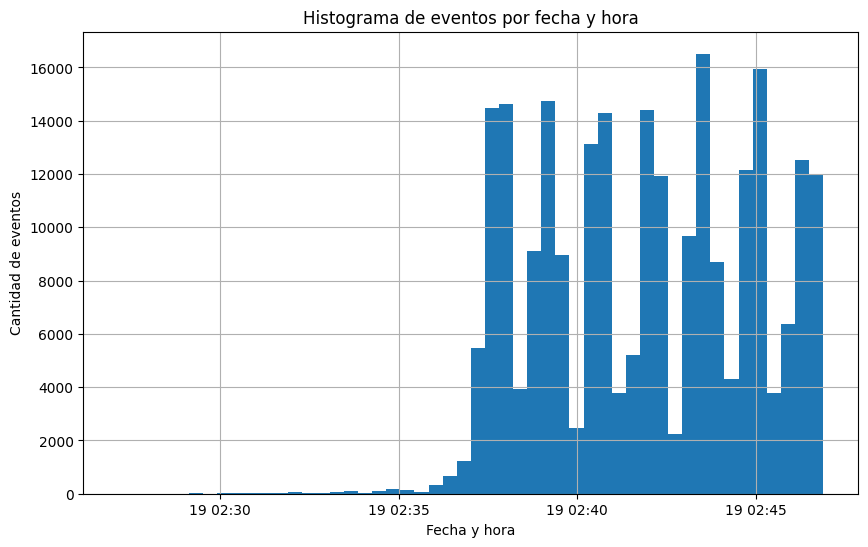

In [8]:
# Trazar el histograma
data['event_datetime'].hist(bins=50, figsize=(10,6))
plt.title("Histograma de eventos por fecha y hora")
plt.xlabel("Fecha y hora")
plt.ylabel("Cantidad de eventos")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Te felicito, el gráfico que has realizado ha quedado muy bien! Además de muy facil de leer. Y justamente como emncionas abajo, la data que podríamos considerar útil para los análisis es la que está adelante del dia 19.

#### ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?
Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

**Respuesta**: A partir del histograma, se puede observar que los eventos se vuelven consistentes y frecuentes a partir de aproximadamente las 02:30 del día 19. Con base en esto, puedes decidir que los datos son completos y confiables a partir de ese punto.

Podemos filtrar los datos para excluir los eventos anteriores a este momento, de manera que solo se incluyan eventos a partir del momento donde los datos son consistentes.

In [9]:
# Establecer la fecha en la que los datos comienzan a estar completos (basado en el histograma)
complete_start_datetime = '1970-01-19 02:30:00'

# Filtrar los datos a partir de ese momento
filtered_data = data[data['event_datetime'] >= complete_start_datetime]

# Mostrar el nuevo periodo de tiempo
print("\n--- Mostrar el nuevo periodo de tiempo ---\n")
min_date_filtered = filtered_data['event_datetime'].min()
max_date_filtered = filtered_data['event_datetime'].max()
print(f"Periodo de tiempo filtrado: Desde {min_date_filtered} hasta {max_date_filtered}")



--- Mostrar el nuevo periodo de tiempo ---

Periodo de tiempo filtrado: Desde 1970-01-19 02:30:00.928000 hasta 1970-01-19 02:46:52.517000


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Exacto! Con esto capturas los datos útiles!

#### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [10]:
# Comparar número de eventos y usuarios antes y después del filtrado
events_after_filter = len(filtered_data)
users_after_filter = filtered_data['device_id_hash'].nunique()

# Eventos y usuarios perdidos
lost_events = total_events - events_after_filter
lost_users = unique_users - users_after_filter
print("\n--- Eventos y usuarios perdidos ---\n")
print(f"Eventos perdidos al excluir los más antiguos: {lost_events}")
print(f"Usuarios perdidos al excluir los más antiguos: {lost_users}")



--- Eventos y usuarios perdidos ---

Eventos perdidos al excluir los más antiguos: 40
Usuarios perdidos al excluir los más antiguos: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Acá tal vez hubiera valido la pena colocar en porcentajes, cual es el tamaño de la perdida.

#### Asegúrate de tener usuarios de los tres grupos experimentales:

In [11]:
# Contar usuarios únicos por cada grupo experimental
print("\n--- Asegurarse de que hay usuarios en los tres grupos ---\n")
users_by_group = filtered_data.groupby('exp_id')['device_id_hash'].nunique()
print("Usuarios por grupo experimental:")
print(users_by_group)

# Asegurarse de que hay usuarios en los tres grupos
exp_groups = filtered_data['exp_id'].unique()
print("---")
print(f"Grupos experimentales presentes: {exp_groups}")



--- Asegurarse de que hay usuarios en los tres grupos ---

Usuarios por grupo experimental:
exp_id
246    2489
247    2520
248    2542
Name: device_id_hash, dtype: int64
---
Grupos experimentales presentes: [246, 247, 248]
Categories (3, int64): [246, 247, 248]


### Conclusión del estudio y comprobación de datos

- Los datos de eventos son confiables y completos a partir de la marca temporal de las ``02:30``.
- La pérdida de eventos es mínima y no afecta el análisis.
- Además, la base de usuarios y la representación de los grupos experimentales es equilibrada, lo que garantiza que los análisis posteriores serán robustos y sin sesgos significativos.

## Estudiar el embudo de eventos

- Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
- Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.
- ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
- Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).
- ¿En qué etapa pierdes más usuarios y usuarias?
- ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

### Eventos y su frecuencia de suceso

In [12]:
# Contar la frecuencia de cada evento y ordenarlos por frecuencia
event_frequencies = filtered_data['event_name'].value_counts()
print("\n--- Contar la frecuencia de cada evento y ordenarlos por frecuencia ---\n")
print("Frecuencia de eventos (ordenados):")
print(event_frequencies)



--- Contar la frecuencia de cada evento y ordenarlos por frecuencia ---

Frecuencia de eventos (ordenados):
MainScreenAppear           119081
OffersScreenAppear          46803
CartScreenAppear            42660
PaymentScreenSuccessful     34113
Tutorial                     1016
Name: event_name, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Mira que interesante! Con lo que hiciste, es muy claro que esto tiene el comportamiento clásico de un embudo. Donde la cantidad de interacciones va disminuyendo conforme se avanza en el embudo.

### Cantidad de usuarios que realizaron cada acción

In [13]:
# Contar cuántos usuarios realizaron cada evento
users_per_event = filtered_data.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False)
total_unique_users = filtered_data['device_id_hash'].nunique()

# Calcular la proporción de usuarios que realizaron cada evento
proportion_users_per_event = users_per_event / total_unique_users

print("\n--- Cantidad de usuarios que realizaron cada acción ---\n")
print("Número de usuarios por evento (ordenados):")
print(users_per_event)

print("\nProporción de usuarios por evento:")
print(proportion_users_per_event)



--- Cantidad de usuarios que realizaron cada acción ---

Número de usuarios por evento (ordenados):
event_name
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Tutorial                    846
Name: device_id_hash, dtype: int64

Proporción de usuarios por evento:
event_name
MainScreenAppear           0.985168
OffersScreenAppear         0.610912
CartScreenAppear           0.496491
PaymentScreenSuccessful    0.469739
Tutorial                   0.112038
Name: device_id_hash, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Justamente! En terminos de porcentaje es mucho más claro como va disminuyendo la cantidad de interacciones.

### Orden de las acciones y secuencia

El orden de los eventos en secuencia sería:

 1. MainScreenAppear --> Pantalla principal
 2. Tutorial --> Tutotial de cómo funciona la aplicación
 3. OffersScreenAppear --> Pantalla de una oferta
 4. CartScreenAppear --> Carrito de la compra
 5. PaymentScreenSuccessful --> Confirmación del pago
 
### Embudo de eventos: proporción de usuarios que pasan de una etapa a la siguiente

In [14]:
# Reemplazamos con los nombres de los eventos reales en el orden:
# 1. MainScreenAppear
# 2. Tutorial
# 3. OffersScreenAppear
# 4. CartScreenAppear
# 5. PaymentScreenSuccessful

# Número de usuarios que realizaron cada evento en la secuencia
users_main_screen = filtered_data[filtered_data['event_name'] == 'MainScreenAppear']['device_id_hash'].nunique()
users_tutorial = filtered_data[filtered_data['event_name'] == 'Tutorial']['device_id_hash'].nunique()
users_offers = filtered_data[filtered_data['event_name'] == 'OffersScreenAppear']['device_id_hash'].nunique()
users_cart = filtered_data[filtered_data['event_name'] == 'CartScreenAppear']['device_id_hash'].nunique()
users_payment = filtered_data[filtered_data['event_name'] == 'PaymentScreenSuccessful']['device_id_hash'].nunique()

# Calcular las proporciones de usuarios que pasan de una etapa a la siguiente
proportion_main_to_tutorial = users_tutorial / users_main_screen if users_main_screen != 0 else 0
proportion_tutorial_to_offers = users_offers / users_tutorial if users_tutorial != 0 else 0
proportion_offers_to_cart = users_cart / users_offers if users_offers != 0 else 0
proportion_cart_to_payment = users_payment / users_cart if users_cart != 0 else 0

# Agregar la proporción de MainScreenAppear a OffersScreenAppear (sin contar Tutorial)
proportion_main_to_offers = users_offers / users_main_screen if users_main_screen != 0 else 0

# Mostrar las proporciones
print("\n --- Tasas de conversión de cada etapa: --- \n")
print(f"Proporción de usuarios que pasan de MainScreenAppear a Tutorial: {proportion_main_to_tutorial * 100:.2f}%")
print(f"Proporción de usuarios que pasan de Tutorial a OffersScreenAppear: {proportion_tutorial_to_offers * 100:.2f}%")
print(f"Proporción de usuarios que pasan de MainScreenAppear a OffersScreenAppear (sin contar Tutorial): {proportion_main_to_offers * 100:.2f}%")
print(f"Proporción de usuarios que pasan de OffersScreenAppear a CartScreenAppear: {proportion_offers_to_cart * 100:.2f}%")
print(f"Proporción de usuarios que pasan de CartScreenAppear a PaymentScreenSuccessful: {proportion_cart_to_payment * 100:.2f}%")



 --- Tasas de conversión de cada etapa: --- 

Proporción de usuarios que pasan de MainScreenAppear a Tutorial: 11.37%
Proporción de usuarios que pasan de Tutorial a OffersScreenAppear: 545.27%
Proporción de usuarios que pasan de MainScreenAppear a OffersScreenAppear (sin contar Tutorial): 62.01%
Proporción de usuarios que pasan de OffersScreenAppear a CartScreenAppear: 81.27%
Proporción de usuarios que pasan de CartScreenAppear a PaymentScreenSuccessful: 94.61%


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien! Por lo que vemos de los números que muestras, valdría mucho la pena prescindir de la fase tutorial, pues incluso mete bastante ruido, al menos en este punto donde estás viendo la tasa de conversión.

### Identificar la etapa con mayor pérdida de usuarios:

La mayor parte de los usuarios no comienzan el ``Tutorial``. Sin embargo, en la etapa siguiente vemos que hay un número desproporcionado de usuarios lo que sugiere que el ``Tutorial`` es opcional y muchos usuarios pasan directamente de la ``MainScreenAppear`` al ``OfferScreenAppear``. Por eso agregué la proporción de usuarios entre estas 2 etapas, la cual sigue siendo la que "pierde" más usuarios, pero ya no estamos hablando de un ``11.37%`` sino de un ``62.01%``, que parece mucho más razonable.

### Porcentaje de usuarios que completan todo el embudo

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Exacto! La capa tutorial muchos usuarios la omiten. Excelente observación.

In [15]:
# Proporción de usuarios que completan el embudo partiendo de MainScreenAppear
proportion_complete_journey_from_mainscreen = users_payment / users_main_screen if users_main_screen != 0 else 0

# Proporción de usuarios que completan el embudo con respecto al total de usuarios únicos
proportion_complete_journey_total_users = users_payment / total_unique_users if total_unique_users != 0 else 0

# Mostrar resultados
print("\n --- Usuarios que pagaron: --- \n")
print(f"Porcentaje de usuarios que completan todo el embudo (partiendo de MainScreenAppear): {proportion_complete_journey_from_mainscreen * 100:.2f}%")
print(f"Porcentaje de usuarios que completan todo el embudo (sobre el total de usuarios únicos): {proportion_complete_journey_total_users * 100:.2f}%")



 --- Usuarios que pagaron: --- 

Porcentaje de usuarios que completan todo el embudo (partiendo de MainScreenAppear): 47.68%
Porcentaje de usuarios que completan todo el embudo (sobre el total de usuarios únicos): 46.97%


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy atinada conclusión. Y de hecho casi 50% de usuarios que completan el embudo no es malo, generalmente, en aplicaciones reales, este porcentajte puede llegar a ser mucho menor.

La pequeña diferencia (0.71%) sugiere que hay algunos usuarios que ingresaron directamente en otros puntos del flujo (por ejemplo, directamente en una oferta o en el carrito de compras), sin pasar necesariamente por la pantalla principal. Estos usuarios están incluidos en el cálculo del **total de usuarios únicos**, pero no en el cálculo que parte de `MainScreenAppear`.


### Conclusiones del análisis del embudo de eventos

- **Alta conversión hacia el pago**: El embudo tiene un rendimiento muy sólido en las últimas etapas, con una tasa de conversión de **94.61%** de usuarios que completan la compra después de agregar productos al carrito. Esto indica que una vez que los usuarios muestran interés real en comprar, es muy probable que completen la transacción.
  
- **Tutorial poco utilizado**: El tutorial tiene una tasa de participación baja, con solo un **11.37%** de los usuarios que lo completan tras llegar a la pantalla principal. Esto sugiere que el tutorial podría ser una opción menos relevante para la mayoría de los usuarios.

- **Buena retención en la etapa de ofertas**: Más del **62%** de los usuarios pasan directamente de la pantalla principal a las ofertas, lo que indica que el interés por explorar productos u ofertas es un comportamiento común.

- **Pérdida principal entre pantalla principal y ofertas**: A pesar de que más de la mitad de los usuarios acceden a la pantalla de ofertas, todavía hay una caída significativa del **38%** de usuarios que no avanzan desde la pantalla principal, lo que sugiere una oportunidad para optimizar la experiencia inicial y aumentar el número de usuarios que exploran ofertas.


## Estudiar los resultados del experimento

- ¿Cuántos usuarios y usuarias hay en cada grupo?
- Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
- Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
- Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
- ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

### ¿Cuántos usuarios hay en cada grupo?

In [16]:
# Contar usuarios únicos por cada grupo experimental
users_per_group = filtered_data.groupby('exp_id')['device_id_hash'].nunique()
print("\n --- Usuarios por grupo --- \n")
print("Número de usuarios por grupo:")
print(users_per_group)



 --- Usuarios por grupo --- 

Número de usuarios por grupo:
exp_id
246    2489
247    2520
248    2542
Name: device_id_hash, dtype: int64


### Comparar si hay una diferencia estadísticamente significativa entre las muestras de control 246 y 247 (Test A/A)

In [17]:
# Número de usuarios por grupo
users_group_246 = filtered_data[filtered_data['exp_id'] == 246]['device_id_hash'].nunique()
users_group_247 = filtered_data[filtered_data['exp_id'] == 247]['device_id_hash'].nunique()

# Número total de usuarios en ambos grupos
total_users = users_group_246 + users_group_247

# Hacer una prueba Z para comparar las proporciones entre los dos grupos
count = [users_group_246, users_group_247]
nobs = [total_users, total_users]
stat, p_value = proportions_ztest(count, nobs)
print("\n --- Comparar si hay una diferencia estadísticamente significativa --- \n")
print(f"Prueba Z entre grupo 246 y grupo 247: estadístico = {stat}, p-valor = {p_value}")
print("---")
if p_value < 0.05:
    print("La diferencia entre los grupos 246 y 247 es estadísticamente significativa.")
else:
    print("No hay una diferencia estadísticamente significativa entre los grupos 246 y 247.")



 --- Comparar si hay una diferencia estadísticamente significativa --- 

Prueba Z entre grupo 246 y grupo 247: estadístico = -0.6194427521718309, p-valor = 0.535624724397024
---
No hay una diferencia estadísticamente significativa entre los grupos 246 y 247.


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelente, el ztest es adecuado para testear proporciones entre dos grupos de datos. 

### Seleccionar el evento más popular

In [18]:
# Seleccionar el evento más popular
most_popular_event = 'MainScreenAppear'

# Contar usuarios por grupo que realizaron el evento más popular
users_per_group_event = filtered_data[filtered_data['event_name'] == most_popular_event].groupby('exp_id')['device_id_hash'].nunique()

# Proporciones de usuarios que realizaron el evento en cada grupo
proportion_per_group_event = users_per_group_event / users_per_group
print("\n --- Seleccionar el evento más popular --- \n")
print(f"Usuarios por grupo que realizaron el evento {most_popular_event}:")
print(users_per_group_event)

print(f"Proporción de usuarios que realizaron el evento {most_popular_event}:")
print(proportion_per_group_event)



 --- Seleccionar el evento más popular --- 

Usuarios por grupo que realizaron el evento MainScreenAppear:
exp_id
246    2456
247    2482
248    2501
Name: device_id_hash, dtype: int64
Proporción de usuarios que realizaron el evento MainScreenAppear:
exp_id
246    0.986742
247    0.984921
248    0.983871
Name: device_id_hash, dtype: float64


### Comparar si la diferencia en proporciones para el evento más popular es estadísticamente significativa

In [19]:
# Convertir exp_id a entero para asegurar acceso correcto a los índices si es category
users_per_group_event.index = users_per_group_event.index.astype(int)
users_per_group.index = users_per_group.index.astype(int)
print("\n --- Comparar si la diferencia en proporciones --- \n")

# Verificar los índices disponibles en users_per_group
print("Índices en users_per_group:")
print(users_per_group.index)

print("---")

# Si 246 o 247 no están presentes, muestra un mensaje
if 246 not in users_per_group.index or 247 not in users_per_group.index:
    print("Error: Los grupos 246 o 247 no están presentes en users_per_group.")
else:
    # Proporciones de usuarios que realizaron el evento en los grupos 246 y 247
    count = [users_per_group_event[246], users_per_group_event[247]]
    nobs = [users_per_group[246], users_per_group[247]]  # Total de usuarios en cada grupo

    # Prueba Z para comparar las proporciones
    stat, p_value = proportions_ztest(count, nobs)

    # Mostrar los resultados
    print(f"Prueba Z para el evento {most_popular_event} entre grupo 246 y grupo 247: estadístico = {stat}, p-valor = {p_value}")
    print("---")
    if p_value < 0.05:
        print(f"La diferencia en proporciones para el evento {most_popular_event} entre los grupos 246 y 247 es estadísticamente significativa.")
    else:
        print(f"No hay una diferencia estadísticamente significativa para el evento {most_popular_event} entre los grupos 246 y 247.")



 --- Comparar si la diferencia en proporciones --- 

Índices en users_per_group:
Int64Index([246, 247, 248], dtype='int64', name='exp_id')
---
Prueba Z para el evento MainScreenAppear entre grupo 246 y grupo 247: estadístico = 0.5451301916932931, p-valor = 0.5856639791209877
---
No hay una diferencia estadísticamente significativa para el evento MainScreenAppear entre los grupos 246 y 247.


<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Muy bien ejecutado! Sabes que resultaría muy interesante? El analizar porque para el evento más popular, que es el primero en el embudo, no hay diferencia significativa.

### Repetir el análisis para todos los eventos y verificar si los grupos se dividieron correctamente

In [20]:
print("\n --- Repetir el análisis para todos los eventos --- \n")

def test_significance_for_all_events(filtered_data, group_1, group_2):
    event_names = filtered_data['event_name'].unique()
    
    for event in event_names:
        # Contar usuarios por grupo que realizaron cada evento
        users_per_group_event = filtered_data[filtered_data['event_name'] == event].groupby('exp_id')['device_id_hash'].nunique()

        # Asegurarnos de que los índices son enteros
        users_per_group_event.index = users_per_group_event.index.astype(int)

        # Verificar que ambos grupos están presentes
        if group_1 in users_per_group_event.index and group_2 in users_per_group_event.index:
            # Proporciones de usuarios por evento en ambos grupos
            count = [users_per_group_event[group_1], users_per_group_event[group_2]]
            nobs = [users_per_group[group_1], users_per_group[group_2]]

            # Prueba Z para comparar las proporciones
            stat, p_value = proportions_ztest(count, nobs)

            # Mostrar resultados
            print(f"Evento: {event}")
            print(f"Estadístico Z: {stat}, p-valor: {p_value}")
            if p_value < 0.05:
                print(f"Diferencia significativa para el evento {event} entre los grupos {group_1} y {group_2}\n")
            else:
                print(f"No hay una diferencia significativa para el evento {event} entre los grupos {group_1} y {group_2}\n")
        else:
            print(f"El evento {event} no está presente en uno o ambos grupos ({group_1}, {group_2}).\n")

# Llamar a la función para los grupos 246 y 247
test_significance_for_all_events(filtered_data, 246, 247)



 --- Repetir el análisis para todos los eventos --- 

Evento: MainScreenAppear
Estadístico Z: 0.5451301916932931, p-valor: 0.5856639791209877
No hay una diferencia significativa para el evento MainScreenAppear entre los grupos 246 y 247

Evento: PaymentScreenSuccessful
Estadístico Z: 1.602588827462412, p-valor: 0.10902546202332887
No hay una diferencia significativa para el evento PaymentScreenSuccessful entre los grupos 246 y 247

Evento: CartScreenAppear
Estadístico Z: 1.2867673033495426, p-valor: 0.19817540651836918
No hay una diferencia significativa para el evento CartScreenAppear entre los grupos 246 y 247

Evento: OffersScreenAppear
Estadístico Z: 0.9876532351909723, p-valor: 0.3233225048227193
No hay una diferencia significativa para el evento OffersScreenAppear entre los grupos 246 y 247

Evento: Tutorial
Estadístico Z: -0.11217411311023003, p-valor: 0.910685354348788
No hay una diferencia significativa para el evento Tutorial entre los grupos 246 y 247



#### **Confirmación de la correcta división de los grupos de control (246 y 247)**:
Al comparar los grupos de control (246 y 247) en cuanto a la proporción de usuarios que realizaron cada evento, **no se encontró una diferencia estadísticamente significativa** para ninguno de los eventos analizados. Los resultados fueron consistentes para eventos como:
   - **MainScreenAppear** (p-valor = 0.585)
   - **PaymentScreenSuccessful** (p-valor = 0.109)
   - **CartScreenAppear** (p-valor = 0.198)
   - **OffersScreenAppear** (p-valor = 0.323)
   - **Tutorial** (p-valor = 0.910)
   
Esto indica que no hay evidencia de diferencias sistemáticas entre los grupos de control, lo que **confirma que los grupos se dividieron correctamente** y que el experimento no presenta sesgos en la distribución de usuarios entre estos dos grupos.

### Hacer lo mismo para el grupo con fuentes alteradas (248)

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Excelentemente ejecutado! La implementación de la función es una excelente practica, con esto aseguras escalabilidad de tu código.  En este caso, valdría mucho la pena indagar el porque en ningún caso hay diferencias significativas ¿Qué piensas?

In [21]:
# Definir la función antes de invocarla
def compare_combined_control_with_altered(filtered_data, combined_users, altered_group):
    event_names = filtered_data['event_name'].unique()
    
    for event in event_names:
        # Contar usuarios que realizaron el evento en los grupos combinados y en el grupo alterado
        users_per_group_event = filtered_data[filtered_data['event_name'] == event].groupby('exp_id')['device_id_hash'].nunique()

        # Asegurarnos de que los índices son enteros
        users_per_group_event.index = users_per_group_event.index.astype(int)

        # Verificar que los grupos 246, 247 y el grupo alterado están presentes
        if 246 in users_per_group_event.index and 247 in users_per_group_event.index and altered_group in users_per_group_event.index:
            combined_count = users_per_group_event[246] + users_per_group_event[247]
            altered_count = users_per_group_event[altered_group]

            count = [combined_count, altered_count]
            nobs = [combined_users, users_per_group[altered_group]]

            # Prueba Z para comparar el grupo combinado de control con el grupo alterado
            stat, p_value = proportions_ztest(count, nobs)

            print(f"Evento: {event}")
            print(f"Estadístico Z (Control combinado vs Grupo {altered_group}): {stat}, p-valor: {p_value}")
            if p_value < 0.05:
                print(f"Diferencia significativa entre el control combinado y el grupo {altered_group} para el evento {event}\n")
            else:
                print(f"No hay una diferencia significativa entre el control combinado y el grupo {altered_group} para el evento {event}\n")
        else:
            print(f"El evento {event} no está presente en uno o ambos grupos (246, 247, {altered_group}).\n")

# Definir la cantidad total de usuarios combinados de los grupos de control (246 + 247)
users_per_combined_control = users_per_group[246] + users_per_group[247]

# Comparar el grupo combinado de control con el grupo 248
print("\n --- Repetir el análisis para el grupo con fuentes alteradas --- \n")
compare_combined_control_with_altered(filtered_data, users_per_combined_control, 248)



 --- Repetir el análisis para el grupo con fuentes alteradas --- 

Evento: MainScreenAppear
Estadístico Z (Control combinado vs Grupo 248): 0.6639650253017861, p-valor: 0.5067126962216841
No hay una diferencia significativa entre el control combinado y el grupo 248 para el evento MainScreenAppear

Evento: PaymentScreenSuccessful
Estadístico Z (Control combinado vs Grupo 248): 0.4428932702292813, p-valor: 0.6578429353593096
No hay una diferencia significativa entre el control combinado y el grupo 248 para el evento PaymentScreenSuccessful

Evento: CartScreenAppear
Estadístico Z (Control combinado vs Grupo 248): 1.1240750513116875, p-valor: 0.2609811882648244
No hay una diferencia significativa entre el control combinado y el grupo 248 para el evento CartScreenAppear

Evento: OffersScreenAppear
Estadístico Z (Control combinado vs Grupo 248): 0.7462102714499221, p-valor: 0.4555404043137232
No hay una diferencia significativa entre el control combinado y el grupo 248 para el evento Offers

#### Conclusiones finales del experimento:

1. **Comparación de los grupos de control (246 y 247)**:
   - No se encontraron diferencias significativas entre los grupos de control para ninguno de los eventos analizados, lo que confirma que los usuarios se asignaron de manera adecuada y los grupos son estadísticamente similares en su comportamiento. Esto refuerza la validez del experimento en cuanto a la distribución equitativa de usuarios.

2. **Impacto de las fuentes alteradas (grupo 248)**:
   - El análisis del grupo con fuentes alteradas (248) frente a los grupos de control y el grupo combinado de control no mostró diferencias significativas en la proporción de usuarios que realizaron los eventos principales (`MainScreenAppear`, `PaymentScreenSuccessful`, `CartScreenAppear`, etc.).
   - El uso de las fuentes alteradas en el grupo 248 **no afectó significativamente** el comportamiento de los usuarios en comparación con los grupos de control.

3. **Nivel de significación corregido**:
   - Incluso después de aplicar la corrección de **Bonferroni** (reduciendo el nivel de significancia a 0.01 para controlar el riesgo de falsos positivos debido a múltiples pruebas), no se encontraron diferencias significativas entre los grupos. Esto proporciona aún más confianza en la conclusión de que las fuentes alteradas no tuvieron un impacto detectable en el comportamiento de los usuarios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Te felicito por haber hecho uso de la corrección de Bonferroni, este es un concepto nada basico y lo has implementado en el lugar justo, te felicito.

#### Nivel de significación y ajuste para pruebas múltiples

In [22]:
# Nivel de significación original
alpha = 0.05
n_tests = len(filtered_data['event_name'].unique())  # Número de eventos únicos (pruebas)

# Nivel de significación ajustado por Bonferroni
alpha_corrected = alpha / n_tests
print(f"Nuevo nivel de significación corregido por Bonferroni: {alpha_corrected}")

def test_significance_for_all_events_with_bonferroni(filtered_data, group_1, group_2):
    event_names = filtered_data['event_name'].unique()
    
    for event in event_names:
        # Contar usuarios por grupo que realizaron cada evento
        users_per_group_event = filtered_data[filtered_data['event_name'] == event].groupby('exp_id')['device_id_hash'].nunique()

        # Asegurarnos de que los índices son enteros
        users_per_group_event.index = users_per_group_event.index.astype(int)

        # Verificar que ambos grupos están presentes
        if group_1 in users_per_group_event.index and group_2 in users_per_group_event.index:
            # Proporciones de usuarios por evento en ambos grupos
            count = [users_per_group_event[group_1], users_per_group_event[group_2]]
            nobs = [users_per_group[group_1], users_per_group[group_2]]

            # Prueba Z para comparar las proporciones
            stat, p_value = proportions_ztest(count, nobs)

            # Mostrar resultados con el nivel de significancia corregido
            print(f"Evento: {event}")
            print(f"Estadístico Z: {stat}, p-valor: {p_value}")
            if p_value < alpha_corrected:
                print(f"Diferencia significativa para el evento {event} entre los grupos {group_1} y {group_2} (p-valor < {alpha_corrected})\n")
            else:
                print(f"No hay una diferencia significativa para el evento {event} entre los grupos {group_1} y {group_2} (p-valor >= {alpha_corrected})\n")
        else:
            print(f"El evento {event} no está presente en uno o ambos grupos ({group_1}, {group_2}).\n")

# Llamar a la función para los grupos 246 y 247
print("\n--- Comparar el grupo 246 y 247 con Bonferroni ---\n")

test_significance_for_all_events_with_bonferroni(filtered_data, 246, 247)

# Comparar el grupo 248 con los controles combinados
def compare_combined_control_with_bonferroni(filtered_data, combined_users, altered_group):
    event_names = filtered_data['event_name'].unique()
    
    for event in event_names:
        # Contar usuarios que realizaron el evento en los grupos combinados y en el grupo alterado
        users_per_group_event = filtered_data[filtered_data['event_name'] == event].groupby('exp_id')['device_id_hash'].nunique()

        # Asegurarnos de que los índices son enteros
        users_per_group_event.index = users_per_group_event.index.astype(int)

        # Verificar que los grupos 246, 247 y el grupo alterado están presentes
        if 246 in users_per_group_event.index and 247 in users_per_group_event.index and altered_group in users_per_group_event.index:
            combined_count = users_per_group_event[246] + users_per_group_event[247]
            altered_count = users_per_group_event[altered_group]

            count = [combined_count, altered_count]
            nobs = [combined_users, users_per_group[altered_group]]

            # Prueba Z para comparar el grupo combinado de control con el grupo alterado
            stat, p_value = proportions_ztest(count, nobs)

            print(f"Evento: {event}")
            print(f"Estadístico Z (Control combinado vs Grupo {altered_group}): {stat}, p-valor: {p_value}")
            if p_value < alpha_corrected:
                print(f"Diferencia significativa entre el control combinado y el grupo {altered_group} para el evento {event} (p-valor < {alpha_corrected})\n")
            else:
                print(f"No hay una diferencia significativa entre el control combinado y el grupo {altered_group} para el evento {event} (p-valor >= {alpha_corrected})\n")
        else:
            print(f"El evento {event} no está presente en uno o ambos grupos (246, 247, {altered_group}).\n")

# Comparar el grupo combinado de control con el grupo 248
print("\n--- Comparar el grupo combinado de control con el grupo 248 con Bonferroni ---\n")
compare_combined_control_with_bonferroni(filtered_data, users_per_combined_control, 248)


Nuevo nivel de significación corregido por Bonferroni: 0.01

--- Comparar el grupo 246 y 247 con Bonferroni ---

Evento: MainScreenAppear
Estadístico Z: 0.5451301916932931, p-valor: 0.5856639791209877
No hay una diferencia significativa para el evento MainScreenAppear entre los grupos 246 y 247 (p-valor >= 0.01)

Evento: PaymentScreenSuccessful
Estadístico Z: 1.602588827462412, p-valor: 0.10902546202332887
No hay una diferencia significativa para el evento PaymentScreenSuccessful entre los grupos 246 y 247 (p-valor >= 0.01)

Evento: CartScreenAppear
Estadístico Z: 1.2867673033495426, p-valor: 0.19817540651836918
No hay una diferencia significativa para el evento CartScreenAppear entre los grupos 246 y 247 (p-valor >= 0.01)

Evento: OffersScreenAppear
Estadístico Z: 0.9876532351909723, p-valor: 0.3233225048227193
No hay una diferencia significativa para el evento OffersScreenAppear entre los grupos 246 y 247 (p-valor >= 0.01)

Evento: Tutorial
Estadístico Z: -0.11217411311023003, p-valo

#### **Comparación entre los grupos de control (246 vs 247)**:
- **MainScreenAppear**: p-valor = 0.5856 → No hay diferencia significativa.
- **PaymentScreenSuccessful**: p-valor = 0.109 → No hay diferencia significativa.
- **CartScreenAppear**: p-valor = 0.198 → No hay diferencia significativa.
- **OffersScreenAppear**: p-valor = 0.323 → No hay diferencia significativa.
- **Tutorial**: p-valor = 0.910 → No hay diferencia significativa.

**Conclusión**: No se encontraron diferencias significativas entre los grupos de control 246 y 247 en ninguno de los eventos, incluso después de aplicar la corrección de Bonferroni. Esto refuerza la conclusión de que **los grupos de control se comportan de manera similar** y se dividieron correctamente.

#### **Comparación entre el grupo combinado de control (246 + 247) y el grupo 248 (fuentes alteradas)**:
- **MainScreenAppear**: p-valor = 0.5067 → No hay diferencia significativa.
- **PaymentScreenSuccessful**: p-valor = 0.6578 → No hay diferencia significativa.
- **CartScreenAppear**: p-valor = 0.261 → No hay diferencia significativa.
- **OffersScreenAppear**: p-valor = 0.4555 → No hay diferencia significativa.
- **Tutorial**: p-valor = 0.8288 → No hay diferencia significativa.

**Conclusión**: No se encontraron diferencias significativas entre el grupo combinado de control y el grupo con fuentes alteradas (248). Esto significa que las fuentes alteradas **no tuvieron un impacto significativo** en el comportamiento de los usuarios en ninguno de los eventos analizados.

### Conclusión final:
El experimento muestra que las **fuentes alteradas no tuvieron un impacto significativo** en el comportamiento de los usuarios. Dado que no se encontraron diferencias entre los grupos de control ni con el grupo 248, se puede concluir que el cambio en las fuentes no afecta la interacción de los usuarios con la aplicación en términos de los eventos clave analizados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>

Insisto, estoy de acuerdo que en los grupos de control no haya ninguna diferencia significativa, pero valdría muchisimo la pena para indagar que sucede con el grupo control como para que no exista ninguna diferencia. Pero bueno, más allá de eso, y regresando al notebook, has realizado un excelente trabajo.